Looking at quadra island event (Jun 2015) (results from hindcast)

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls, visualisations, geo_tools, tidetools)
import numpy.ma as ma
from matplotlib import animation, rc
import glob
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [35]:
June = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))[9:17]

In [36]:
June

['/results/SalishSea/hindcast/10jun15/SalishSea_1h_20150610_20150610_grid_T.nc',
 '/results/SalishSea/hindcast/11jun15/SalishSea_1h_20150611_20150611_grid_T.nc',
 '/results/SalishSea/hindcast/12jun15/SalishSea_1h_20150612_20150612_grid_T.nc',
 '/results/SalishSea/hindcast/13jun15/SalishSea_1h_20150613_20150613_grid_T.nc',
 '/results/SalishSea/hindcast/14jun15/SalishSea_1h_20150614_20150614_grid_T.nc',
 '/results/SalishSea/hindcast/15jun15/SalishSea_1h_20150615_20150615_grid_T.nc',
 '/results/SalishSea/hindcast/16jun15/SalishSea_1h_20150616_20150616_grid_T.nc',
 '/results/SalishSea/hindcast/17jun15/SalishSea_1h_20150617_20150617_grid_T.nc']

In [37]:
with nc_tools.scDataset(June) as f:
    t = f.variables['votemper'][:]
    s = f.variables['vosaline'][:]
    depth = f.variables['deptht'][:]
    time = f.variables['time_counter'][:]

In [38]:
date = nc.num2date(time, "seconds since 1900-01-01 00:00:00")

In [41]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')  
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [42]:
density = calc_rho(s, t, depth[np.newaxis, :, np.newaxis, np.newaxis])

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in multiply
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in multiply
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in multiply
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in add


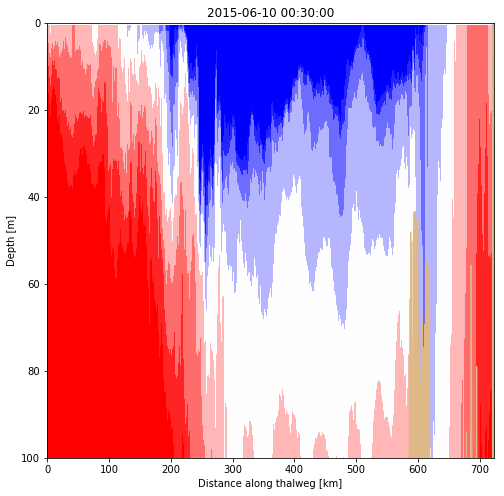

In [44]:
fig, ax = plt.subplots(figsize = (8,8))
def animate30(i):
    ax.clear()
    visualisations.contour_thalweg(ax, density[i,...], bathy, mesh_mask, 
                                   np.linspace(1021.8, 1024.5, 8), cmap = 'bwr')
    ax.set_ylim(100,0)
    ax.set_title(str(date[i])) 
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=192,interval=interval*1e+3, 
                                repeat=False)
ani40

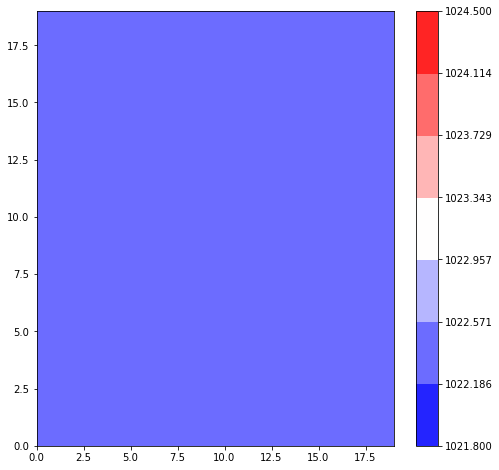

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
den = plt.contourf(np.ones((20,20))*1022.5, levels = np.linspace(1021.8, 1024.5, 8), cmap = 'bwr')
fig.colorbar(den, ax=ax)

# June 7 - 14, 2015

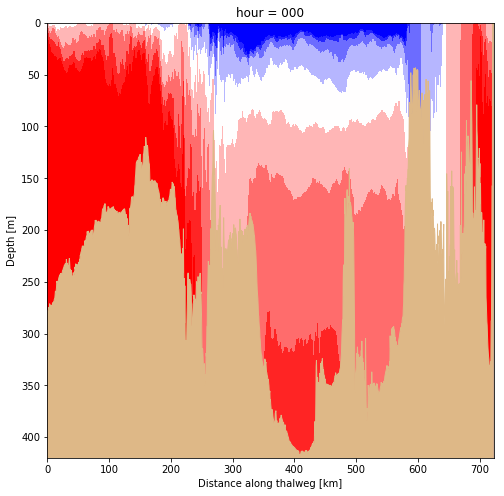

In [51]:
fig, ax = plt.subplots(figsize = (8,8))
def animate30(i):
    ax.clear()
    visualisations.contour_thalweg(ax, density[i,...], bathy, mesh_mask, 
                                   np.linspace(1021.8, 1024.5, 8), cmap = 'bwr')
    ax.set_ylim(420,0)
    ax.set_title('hour = %03d'%(i)) 
    return ax

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=192,interval=interval*1e+3, 
                                repeat=False)
ani40

In [23]:
thalweg_pts = np.loadtxt('thalweg_working.txt')

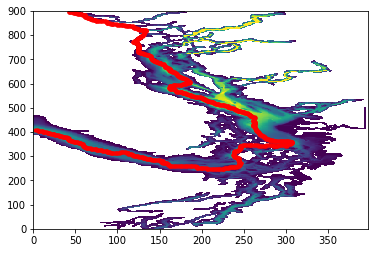

In [24]:
plt.pcolormesh(bathy.variables['Bathymetry'][:])
for pt in thalweg_pts:
    plt.plot(pt[1], pt[0], 'r.')

In [10]:
Bathy, x, y = tidetools.get_bathy_data(bathy)

In [31]:
y[:5]

array([[ 46.85966492,  46.86154556,  46.86342621, ...,  47.59721375,
         47.59906769,  47.60092163],
       [ 46.86278915,  46.86481476,  46.86677933, ...,  47.60125732,
         47.60311127,  47.60496521],
       [ 46.86606979,  46.86814499,  46.87015915, ...,  47.60529709,
         47.60715485,  47.60900879],
       [ 46.86944962,  46.87153244,  46.8735733 , ...,  47.60934067,
         47.61119843,  47.61305237],
       [ 46.8728714 ,  46.87496185,  46.87702179, ...,  47.61338425,
         47.61523819,  47.61709595]])

In [32]:
geo_tools.find_closest_model_point(-125.222436, 50.114362, x,y, land_mask = Bathy.mask)

(761, 137)

In [12]:
June_all = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
with nc_tools.scDataset(June_all) as f:
    s_all = f.variables['vosaline'][:,:,761,137]
    time_all = f.variables['time_counter'][:]

In [11]:
nc.Dataset(June[0]).variables['time_counter']

<class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    axis: T
    standard_name: time
    long_name: Time axis
    calendar: gregorian
    units: seconds since 1900-01-01 00:00:00
    time_origin: 1900-01-01 00:00:00
    bounds: time_counter_bounds
unlimited dimensions: time_counter
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
dates = nc.num2date(time_all, "seconds since 1900-01-01 00:00:00")

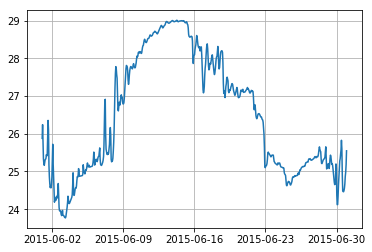

In [30]:
plt.plot(dates, s_all[:,0]);
plt.grid('on')

We can see the water going up and over the sill. Look at the white part. 